In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

## Problem Description

This project uses generative adversarial networks (GANs) to modify a set of images to look like Claude Monet images. This is a Kaggle competition at https://www.kaggle.com/competitions/gan-getting-started.

GAN architectures rely on two copmeting models: a generator and a discriminator. The generator creates the new images, learning over time to make them more Monet-like. The discriminator is trained to identify real and fake images. These two models go back and forth during training, the generator creating increasingly Monet-like images, and the discriminator calling out the fake images. Eventually the created images are good enough that the discriminator can no longer distinguish real from fake images. At this point, our GAN is able to create lifelike or Monet-like images that are indistinguishable from real ones, at least to the discriminator.

This project has a set of Monet images and a set of images that we need to modify with the GAN to look like Monet images. We will explore both sets of images before turning to architecting, training, and evaluating GANs.

The competition asks us to submit a zipped collection of generated images in order to receive a score.

## Preprocessing & Exploratory Data Analysis (EDA)

- tfrec files
- all images are already 256x256 color images


In [79]:
in_dir = '/kaggle/input/gan-getting-started'
out_dir = '/kaggle/working'

monet_tfrec_names = tf.io.gfile.listdir(f'{in_dir}/monet_tfrec')
monet_jpg_names = tf.io.gfile.listdir(f'{in_dir}/monet_jpg')
photo_tfrec_names = tf.io.gfile.listdir(f'{in_dir}/photo_tfrec')
photo_jpg_names = tf.io.gfile.listdir(f'{in_dir}/photo_jpg')


# print(f'Monet TFRECs: {len(monet_names)}')
# print(f'Image TFRECs: {len(image_names)}')
print(len(monet_tfrec_names))
print(len(monet_jpg_names))
print(len(photo_tfrec_names))
print(len(photo_jpg_names))
print(monet_tfrec_names)

5
300
20
7038
['monet12-60.tfrec', 'monet16-60.tfrec', 'monet08-60.tfrec', 'monet04-60.tfrec', 'monet00-60.tfrec']


In [96]:
# Extract records from tfrec files
tfrecs_monet = tf.data.TFRecordDataset([f'{in_dir}/monet_tfrec/{f}' for f in monet_tfrec_names][0])
tfrecs_photo = tf.data.TFRecordDataset([f'{in_dir}/photo_tfrec/{f}' for f in photo_tfrec_names][0])
    
feature_description = {
    'image_name': tf.io.FixedLenFeature([], tf.string)
    , 'image': tf.io.FixedLenFeature([], tf.string)
    , 'target': tf.io.FixedLenFeature([], tf.string)
    
}

def parse_image(record):
    return tf.io.decode_image(
        tf.io.parse_single_example(record, feature_description)['image']
        , channels=3
    )

parsed_images_monet = tfrecs_monet.map(parse_image)
parsed_images_photo = tfrecs_photo.map(parse_image)

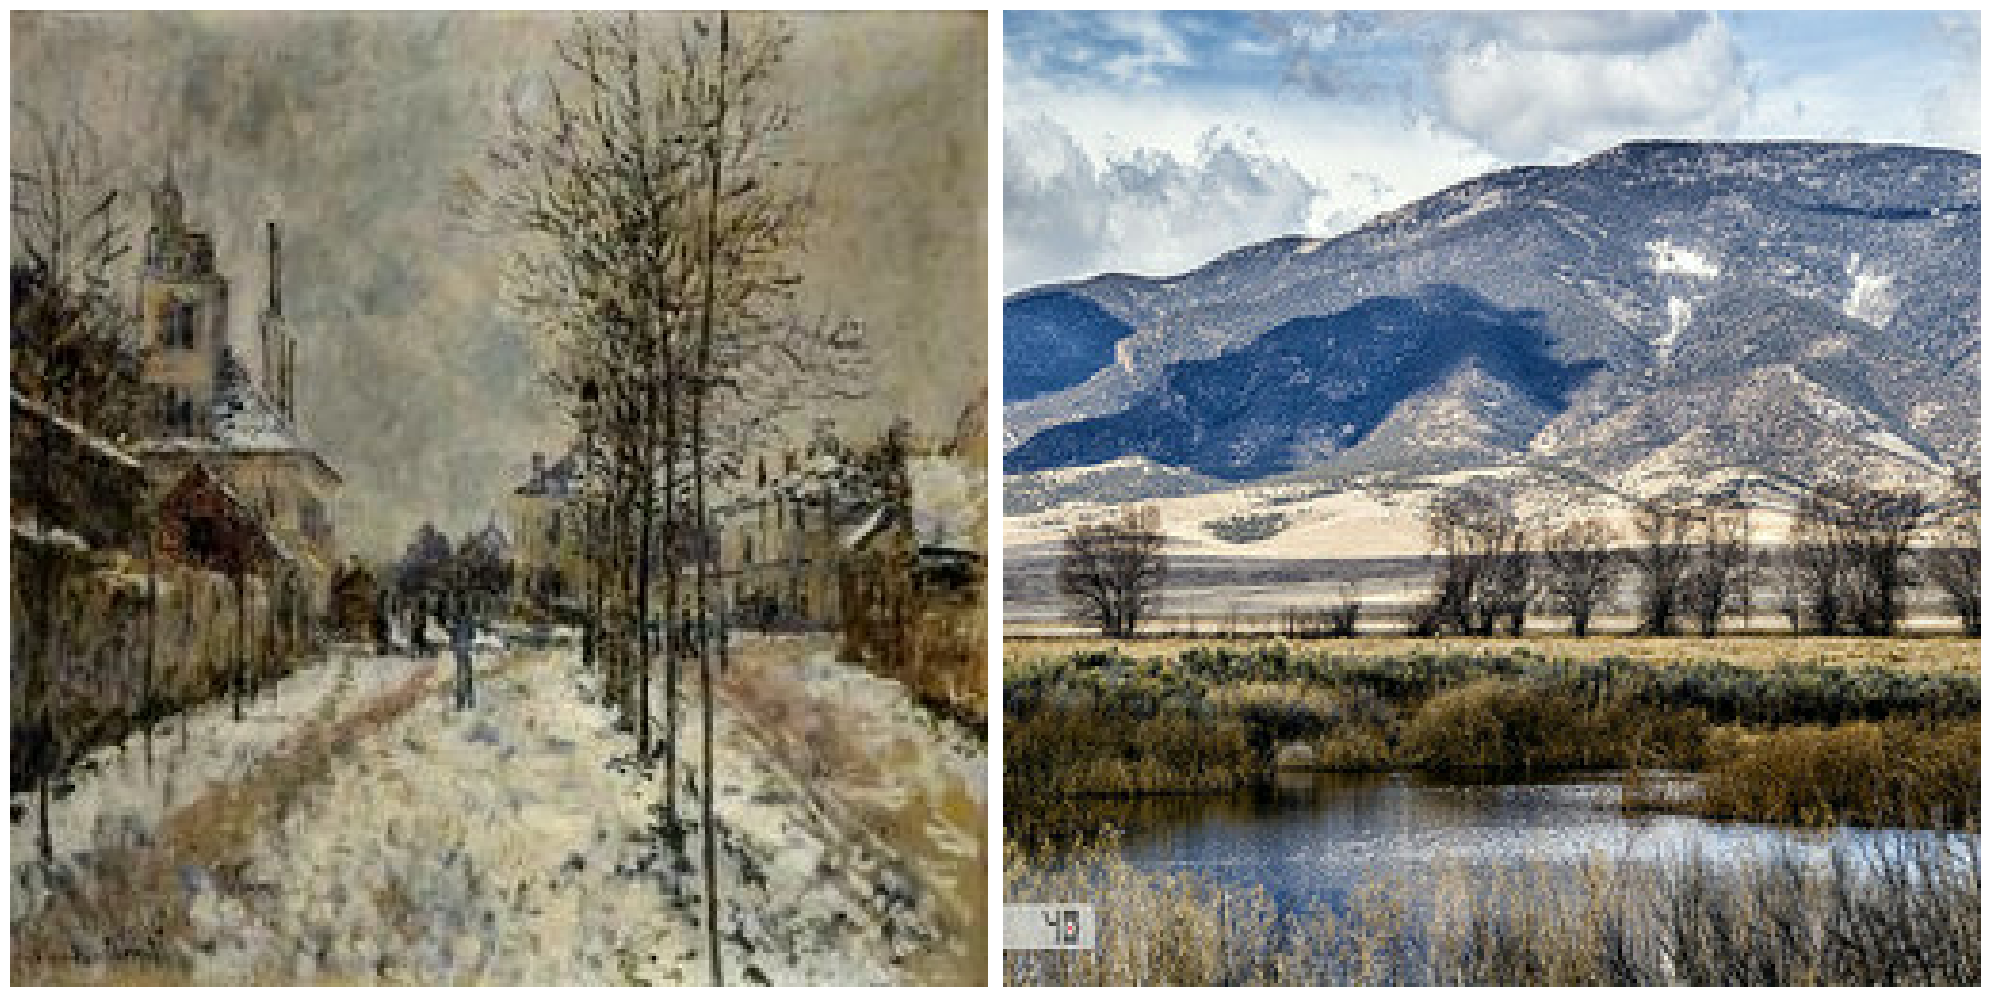

In [104]:
# Set up grid with 2 rows and 5 columns
fig, axes = plt.subplots(
    1
    , 2
    , figsize=(20,20)
)

axes[0].imshow(next(iter(parsed_images_monet)))
axes[1].imshow(next(iter(parsed_images_photo)))


# Turn axis labels and grids off
for ax in axes.ravel():
    ax.set_axis_off()
    
fig.tight_layout()

## References

Working with TensorFlow TFRecords
- https://www.tensorflow.org/tutorials/load_data/tfrecord